# **Project Summary:**

> Weather Prediction and Conversational Chatbot using DialoGPT and RandomForestRegressor



# **Objective:**


> The goal of this project is to create a conversational chatbot that can answer general user queries and provide weather predictions. The chatbot combines generative conversational responses (using DialoGPT) and weather-related predictions (using RandomForestRegressor).


# **The system is designed to:**



>   Answer conversational questions using a pre-trained DialoGPT model.
  Provide weather data based on a dataset of historical weather information.
  Predict future weather (next-day average temperature) using a trained RandomForestRegressor model based on the historical data.



In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
from datetime import datetime, timedelta
import matplotlib.pyplot as plt

# ***Data Loading***

In [2]:


# Set your API key
api_key = 'your_api'  # Replace with your actual API key

# Define the endpoint for historical weather data
# Websie Weather api
url = 'http://api.weatherapi.com/v1/history.json'

# Define the cities to fetch data for
cities = ['Lahore', 'Karachi', 'Islamabad', 'Peshawar', 'Quetta']
weather_data_list = []

# Define the date range for the last year
end_date = datetime.now()
start_date = end_date - timedelta(days=365)

# Loop through each city and fetch historical weather data for the last year
# ... (previous code remains the same)

for city in cities:
    # Loop through each date in the last year
    for n in range(365):  # 365 days
        date = (start_date + timedelta(days=n)).strftime('%Y-%m-%d')  # Format the date as YYYY-MM-DD
        params = {
            'key': api_key,
            'q': city,
            'dt': date  # Specify the date for the historical data
        }

        # Make the API request
        response = requests.get(url, params=params)

        if response.status_code == 200:
            weather_data = response.json()
            historical_weather = weather_data['forecast']['forecastday'][0]['day']
            historical_weather['date'] = date  # Add the date to the data
            historical_weather['city'] = city  # Add the city name to the data

            # Flatten the data if necessary
            # For example, if 'condition' is a dictionary inside 'historical_weather'
            condition = historical_weather.pop('condition')  # Remove the condition dict
            historical_weather['condition_text'] = condition['text']
            historical_weather['condition_icon'] = condition['icon']

            weather_data_list.append(historical_weather)
        else:
            print(f"Error fetching data for {city} on {date}: {response.status_code}")

# Create a DataFrame from the list of historical weather data
dfWeather = pd.DataFrame(weather_data_list)



# Save the DataFrame to a CSV file
dfWeather.to_csv('weatherHistory.csv', index=False)

dfWeather.head()


,maxtemp_c,maxtemp_f,mintemp_c,mintemp_f,avgtemp_c,avgtemp_f,maxwind_mph,maxwind_kph,totalprecip_mm,totalprecip_in,...,avghumidity,daily_will_it_rain,daily_chance_of_rain,daily_will_it_snow,daily_chance_of_snow,uv,date,city,condition_text,condition_icon
0,35.2,95.4,24.2,75.6,29.5,85.1,6.9,11.2,0.00,0.0,...,42,0,0,0,0,9.0,2023-09-27,Lahore,Sunny,//cdn.weatherapi.com/weather/64x64/day/113.png
1,37.9,100.2,25.4,77.7,31.0,87.8,8.9,14.4,0.00,0.0,...,34,0,0,0,0,9.0,2023-09-28,Lahore,Sunny,//cdn.weatherapi.com/weather/64x64/day/113.png
2,38.0,100.4,24.7,76.4,30.7,87.2,15.2,24.5,0.08,0.0,...,34,0,45,0,0,8.0,2023-09-29,Lahore,Patchy rain possible,//cdn.weatherapi.com/weather/64x64/day/176.png
3,35.5,95.9,23.4,74.1,28.9,84.0,6.5,10.4,0.00,0.0,...,36,0,0,0,0,9.0,2023-09-30,Lahore,Sunny,//cdn.weatherapi.com/weather/64x64/day/113.png
4,36.0,96.8,23.6,74.5,29.3,84.8,7.4,11.9,0.00,0.0,...,27,0,0,0,0,9.0,2023-10-01,Lahore,Sunny,//cdn.weatherapi.com/weather/64x64/day/113.png


In [3]:
df= dfWeather.copy()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1825 entries, 0 to 1824
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   maxtemp_c             1825 non-null   float64
 1   maxtemp_f             1825 non-null   float64
 2   mintemp_c             1825 non-null   float64
 3   mintemp_f             1825 non-null   float64
 4   avgtemp_c             1825 non-null   float64
 5   avgtemp_f             1825 non-null   float64
 6   maxwind_mph           1825 non-null   float64
 7   maxwind_kph           1825 non-null   float64
 8   totalprecip_mm        1825 non-null   float64
 9   totalprecip_in        1825 non-null   float64
 10  totalsnow_cm          1825 non-null   float64
 11  avgvis_km             1825 non-null   float64
 12  avgvis_miles          1825 non-null   float64
 13  avghumidity           1825 non-null   int64  
 14  daily_will_it_rain    1825 non-null   int64  
 15  daily_chance_of_rain 

# ***Data Cleaning***


*   Remove Missing Values
*   Remove Duplicate



In [5]:
df.isnull().sum()

,0
maxtemp_c,0
maxtemp_f,0
mintemp_c,0
mintemp_f,0
avgtemp_c,0
avgtemp_f,0
maxwind_mph,0
maxwind_kph,0
totalprecip_mm,0
totalprecip_in,0


In [6]:
print(df.columns)

Index(['maxtemp_c', 'maxtemp_f', 'mintemp_c', 'mintemp_f', 'avgtemp_c',
       'avgtemp_f', 'maxwind_mph', 'maxwind_kph', 'totalprecip_mm',
       'totalprecip_in', 'totalsnow_cm', 'avgvis_km', 'avgvis_miles',
       'avghumidity', 'daily_will_it_rain', 'daily_chance_of_rain',
       'daily_will_it_snow', 'daily_chance_of_snow', 'uv', 'date', 'city',
       'condition_text', 'condition_icon'],
      dtype='object')


In [7]:
df.duplicated().sum()

0

In [8]:
# Drop the specified columns
df = df.drop(columns=['condition_icon','condition_text','avgtemp_f'])


In [9]:
df.head()

,maxtemp_c,maxtemp_f,mintemp_c,mintemp_f,avgtemp_c,maxwind_mph,maxwind_kph,totalprecip_mm,totalprecip_in,totalsnow_cm,avgvis_km,avgvis_miles,avghumidity,daily_will_it_rain,daily_chance_of_rain,daily_will_it_snow,daily_chance_of_snow,uv,date,city
0,35.2,95.4,24.2,75.6,29.5,6.9,11.2,0.00,0.0,0.0,10.0,6.0,42,0,0,0,0,9.0,2023-09-27,Lahore
1,37.9,100.2,25.4,77.7,31.0,8.9,14.4,0.00,0.0,0.0,10.0,6.0,34,0,0,0,0,9.0,2023-09-28,Lahore
2,38.0,100.4,24.7,76.4,30.7,15.2,24.5,0.08,0.0,0.0,10.0,6.0,34,0,45,0,0,8.0,2023-09-29,Lahore
3,35.5,95.9,23.4,74.1,28.9,6.5,10.4,0.00,0.0,0.0,10.0,6.0,36,0,0,0,0,9.0,2023-09-30,Lahore
4,36.0,96.8,23.6,74.5,29.3,7.4,11.9,0.00,0.0,0.0,10.0,6.0,27,0,0,0,0,9.0,2023-10-01,Lahore


# ***Data Transformation***
* Convert categorical variables into numerical



* Normalization/Scaling

## **Split date into year, month & days**

In [10]:


# Convert 'date' column to datetime (make sure to replace 'date' with the actual column name if different)
df['date'] = pd.to_datetime(df['date'])

# Extract year, month, and day and create new columns
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day

# Display the updated DataFrame
print(df[['date', 'year', 'month', 'day']])  # Show the new features




           date  year  month  day
0    2023-09-27  2023      9   27
1    2023-09-28  2023      9   28
2    2023-09-29  2023      9   29
3    2023-09-30  2023      9   30
4    2023-10-01  2023     10    1
...         ...   ...    ...  ...
1820 2024-09-21  2024      9   21
1821 2024-09-22  2024      9   22
1822 2024-09-23  2024      9   23
1823 2024-09-24  2024      9   24
1824 2024-09-25  2024      9   25

[1825 rows x 4 columns]


In [11]:
# Drop the specified columns
df = df.drop(columns=['date'])
df.sample(5)

,maxtemp_c,maxtemp_f,mintemp_c,mintemp_f,avgtemp_c,maxwind_mph,maxwind_kph,totalprecip_mm,totalprecip_in,totalsnow_cm,...,avghumidity,daily_will_it_rain,daily_chance_of_rain,daily_will_it_snow,daily_chance_of_snow,uv,city,year,month,day
467,25.7,78.3,18.4,65.1,21.7,14.1,22.7,0.0,0.00,0.0,...,31,0,0,0,0,7.0,Karachi,2024,1,7
1649,17.3,63.2,8.2,46.8,12.3,13.4,21.6,0.0,0.00,0.0,...,31,0,0,0,0,4.0,Quetta,2024,4,3
918,28.3,83.0,16.0,60.8,22.2,7.2,11.5,0.0,0.00,0.0,...,39,0,0,0,0,6.0,Islamabad,2024,4,2
749,21.2,70.2,16.4,61.6,18.5,12.5,20.2,37.3,1.47,0.0,...,73,1,100,0,0,5.0,Islamabad,2023,10,16
755,25.9,78.6,17.3,63.1,21.3,7.2,11.5,3.0,0.12,0.0,...,51,1,100,0,0,6.0,Islamabad,2023,10,22


**One Hot Encoding to City column**

*   Change catagorical values into 1,0

In [12]:
df = pd.get_dummies(df, columns=['city'], drop_first=True)

In [13]:
df.sample(5)

,maxtemp_c,maxtemp_f,mintemp_c,mintemp_f,avgtemp_c,maxwind_mph,maxwind_kph,totalprecip_mm,totalprecip_in,totalsnow_cm,...,daily_will_it_snow,daily_chance_of_snow,uv,year,month,day,city_Karachi,city_Lahore,city_Peshawar,city_Quetta
37,32.3,90.1,21.0,69.8,26.2,5.1,8.3,0.0,0.0,0.0,...,0,0,8.0,2023,11,3,False,True,False,False
1260,22.8,73.1,13.6,56.5,18.0,3.4,5.4,0.0,0.0,0.0,...,0,0,5.0,2024,3,10,False,False,True,False
360,38.7,101.6,26.2,79.2,32.0,6.9,11.2,0.0,0.0,0.0,...,0,0,9.0,2024,9,21,False,True,False,False
1235,24.0,75.2,10.8,51.4,16.8,5.1,8.3,0.0,0.0,0.0,...,0,0,6.0,2024,2,14,False,False,True,False
1102,36.2,97.1,23.0,73.5,29.1,6.5,10.4,0.0,0.0,0.0,...,0,0,9.0,2023,10,4,False,False,True,False


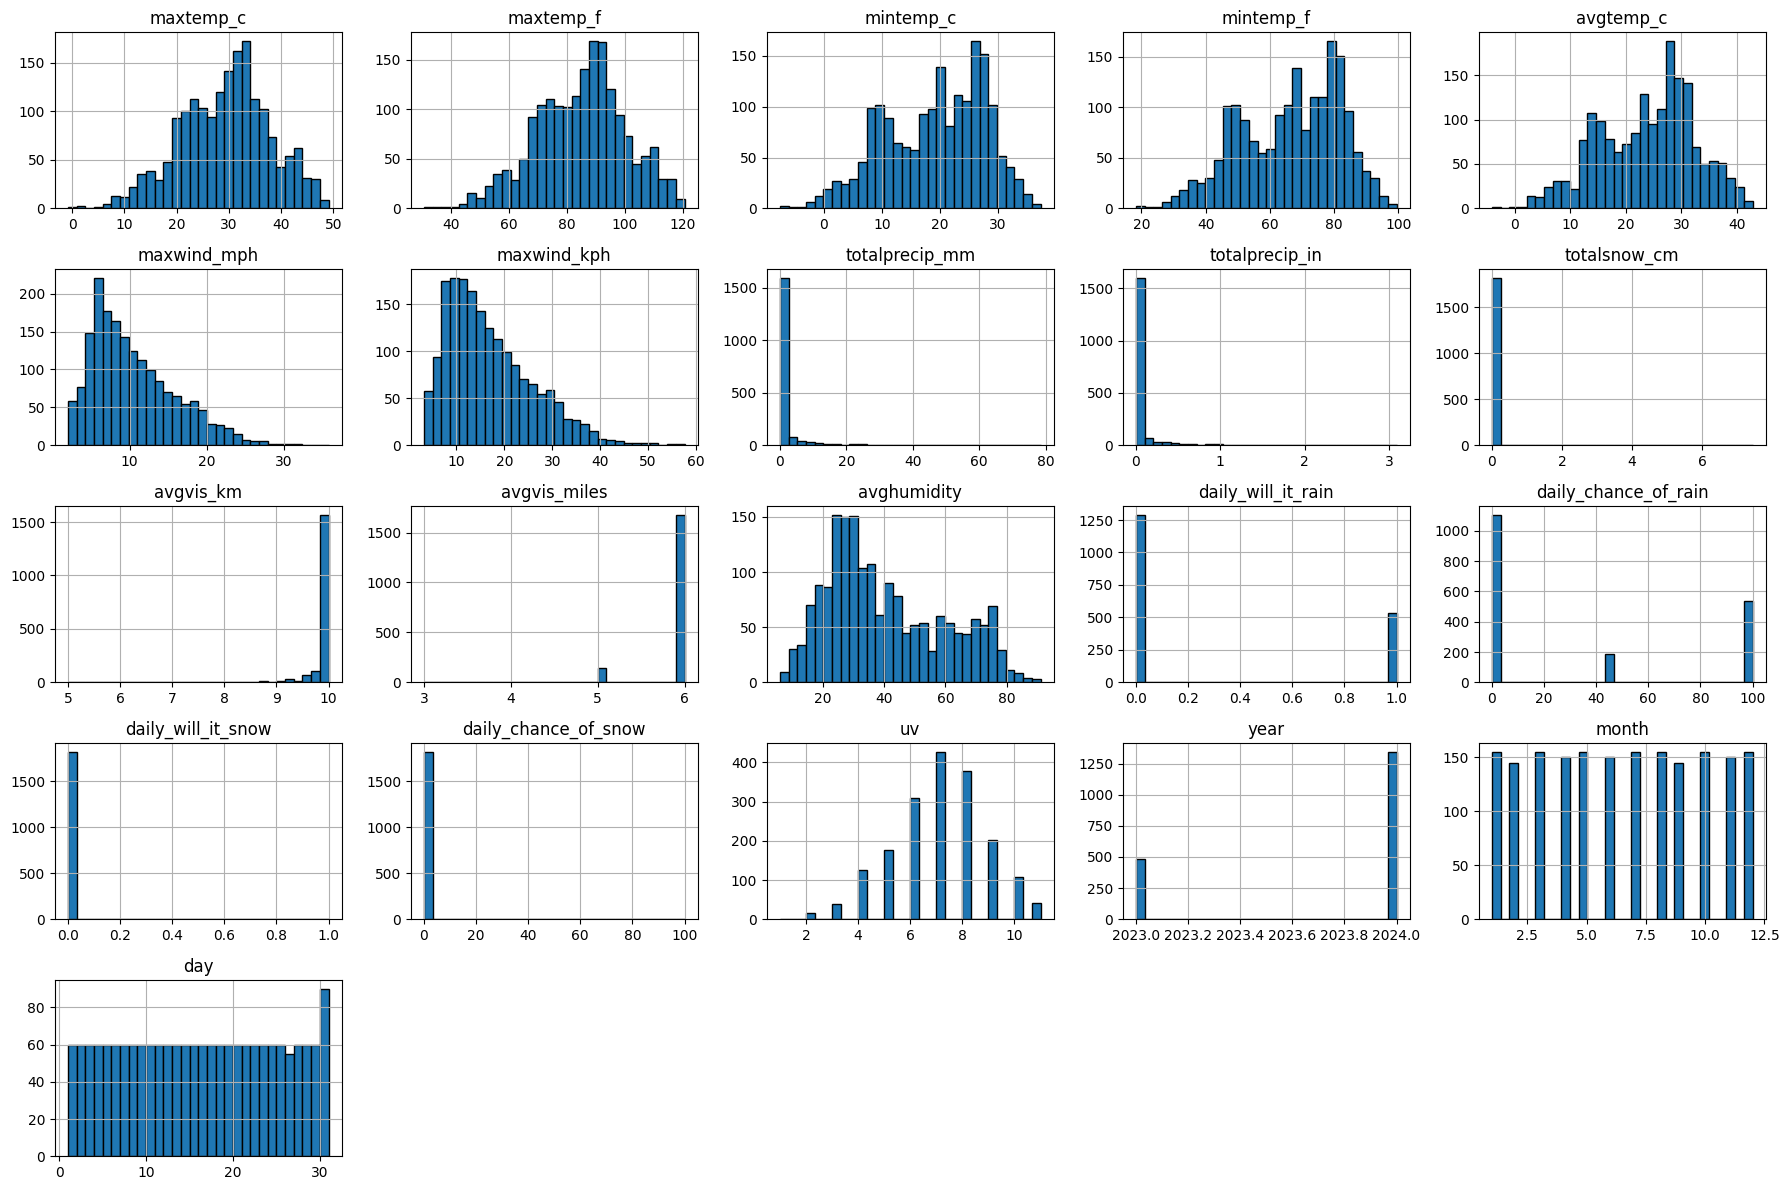

In [14]:
# Automatically plot histograms for all numeric columns in the DataFrame
df.hist(bins=30, figsize=(18, 12), edgecolor='black')
plt.tight_layout()
plt.show()

In [15]:
from scipy import stats

# Shapiro-Wilk Test
for column in df:
    # Check if the column exists in the DataFrame
    if column in df.columns:
        stat, p = stats.shapiro(df[column].dropna())
        print(f'Shapiro-Wilk test for {column}: Statistics={stat:.3f}, p-value={p:.3f}')
    else:
        print(f'Column "{column}" not found in the DataFrame.')

Shapiro-Wilk test for maxtemp_c: Statistics=0.993, p-value=0.000
Shapiro-Wilk test for maxtemp_f: Statistics=0.993, p-value=0.000
Shapiro-Wilk test for mintemp_c: Statistics=0.969, p-value=0.000
Shapiro-Wilk test for mintemp_f: Statistics=0.969, p-value=0.000
Shapiro-Wilk test for avgtemp_c: Statistics=0.983, p-value=0.000
Shapiro-Wilk test for maxwind_mph: Statistics=0.937, p-value=0.000
Shapiro-Wilk test for maxwind_kph: Statistics=0.937, p-value=0.000
Shapiro-Wilk test for totalprecip_mm: Statistics=0.327, p-value=0.000
Shapiro-Wilk test for totalprecip_in: Statistics=0.327, p-value=0.000
Shapiro-Wilk test for totalsnow_cm: Statistics=0.009, p-value=0.000
Shapiro-Wilk test for avgvis_km: Statistics=0.340, p-value=0.000
Shapiro-Wilk test for avgvis_miles: Statistics=0.301, p-value=0.000
Shapiro-Wilk test for avghumidity: Statistics=0.942, p-value=0.000
Shapiro-Wilk test for daily_will_it_rain: Statistics=0.571, p-value=0.000
Shapiro-Wilk test for daily_chance_of_rain: Statistics=0.66

In [16]:
from sklearn.preprocessing import MinMaxScaler

# Drop the target column ('avgtemp_c') and get feature column names
feature_columns = df.drop('avgtemp_c', axis=1).columns

# Initialize MinMaxScaler
scaler = MinMaxScaler()

# Apply MinMaxScaler to the feature columns only
df[feature_columns] = scaler.fit_transform(df[feature_columns])

# Check the scaled data
print(df.head())


   maxtemp_c  maxtemp_f  mintemp_c  mintemp_f  avgtemp_c  maxwind_mph  \
0   0.721443   0.720801   0.706667   0.706535       29.5     0.144970   
1   0.775551   0.774194   0.733333   0.732429       31.0     0.204142   
2   0.777555   0.776418   0.717778   0.716400       30.7     0.390533   
3   0.727455   0.726363   0.688889   0.688039       28.9     0.133136   
4   0.737475   0.736374   0.693333   0.692972       29.3     0.159763   

   maxwind_kph  totalprecip_mm  totalprecip_in  totalsnow_cm  ...  \
0     0.147059        0.000000             0.0           0.0  ...   
1     0.205882        0.000000             0.0           0.0  ...   
2     0.391544        0.001019             0.0           0.0  ...   
3     0.132353        0.000000             0.0           0.0  ...   
4     0.159926        0.000000             0.0           0.0  ...   

   daily_will_it_snow  daily_chance_of_snow   uv  year     month       day  \
0                 0.0                   0.0  0.8   0.0  0.727273  0.

In [17]:
df.head()

,maxtemp_c,maxtemp_f,mintemp_c,mintemp_f,avgtemp_c,maxwind_mph,maxwind_kph,totalprecip_mm,totalprecip_in,totalsnow_cm,...,daily_will_it_snow,daily_chance_of_snow,uv,year,month,day,city_Karachi,city_Lahore,city_Peshawar,city_Quetta
0,0.721443,0.720801,0.706667,0.706535,29.5,0.144970,0.147059,0.000000,0.0,0.0,...,0.0,0.0,0.8,0.0,0.727273,0.866667,0.0,1.0,0.0,0.0
1,0.775551,0.774194,0.733333,0.732429,31.0,0.204142,0.205882,0.000000,0.0,0.0,...,0.0,0.0,0.8,0.0,0.727273,0.900000,0.0,1.0,0.0,0.0
2,0.777555,0.776418,0.717778,0.716400,30.7,0.390533,0.391544,0.001019,0.0,0.0,...,0.0,0.0,0.7,0.0,0.727273,0.933333,0.0,1.0,0.0,0.0
3,0.727455,0.726363,0.688889,0.688039,28.9,0.133136,0.132353,0.000000,0.0,0.0,...,0.0,0.0,0.8,0.0,0.727273,0.966667,0.0,1.0,0.0,0.0
4,0.737475,0.736374,0.693333,0.692972,29.3,0.159763,0.159926,0.000000,0.0,0.0,...,0.0,0.0,0.8,0.0,0.818182,0.000000,0.0,1.0,0.0,0.0


In [18]:
from sklearn.model_selection import train_test_split

# Original features and target
features = df.drop('avgtemp_c', axis=1)
target = df['avgtemp_c']

# Split the data into training (60%), validation (20%), and test set (20%)
X_temp, X_test, y_temp, y_test = train_test_split(features, target, test_size=0.2, random_state=42)  # 20% for the test set
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)  # 25% of the 80% for validation

# X_train and y_train will be used for training the model
# X_val and y_val will be used for cross-validation
# X_test and y_test will be your unseen test set


In [19]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from sklearn.model_selection import cross_val_score

In [20]:
lr= LinearRegression()
rfr=RandomForestRegressor()

In [21]:
#lets train the data by RandomForestRegressor
lr.fit(X_train, y_train)

cv_scores = cross_val_score(lr, X_val, y_val, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")

# Make predictions on the test set
y_test_pred = lr.predict(X_test)

# Calculate Mean Squared Error and R² Score
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Test Mean Squared Error: {test_mse:.4f}")
print(f"Test R² Score: {test_r2:.4f}")

Cross-Validation R² Scores: [0.99767879 0.99787672 0.99724961 0.99758603 0.99855488]
Test Mean Squared Error: 0.1889
Test R² Score: 0.9973


In [22]:
#lets train the data by RandomForestRegressor
rfr.fit(X_train, y_train)

cv_scores = cross_val_score(rfr, X_val, y_val, cv=5, scoring='r2')
print(f"Cross-Validation R² Scores: {cv_scores}")

y_predit = rfr.predict(X_test)
mse = mean_squared_error(y_test, y_predit)
print(f"Mean Squared Error: {mse:.4f}")
r2 = r2_score(y_test, y_predit)
print(f"R² Score: {r2:.4f}")

Cross-Validation R² Scores: [0.99599578 0.99508991 0.9954006  0.99423634 0.99067847]
Mean Squared Error: 0.2007
R² Score: 0.9972


In [23]:
print(X_train.shape)
print(y_train.shape)


(1095, 24)
(1095,)


In [24]:
X_train_aligned, Y_train_aligned = X_train.align(y_train, join='inner', axis=0)


In [25]:
print(X_train_aligned.shape)
print(Y_train_aligned.shape)


(1095, 24)
(1095,)


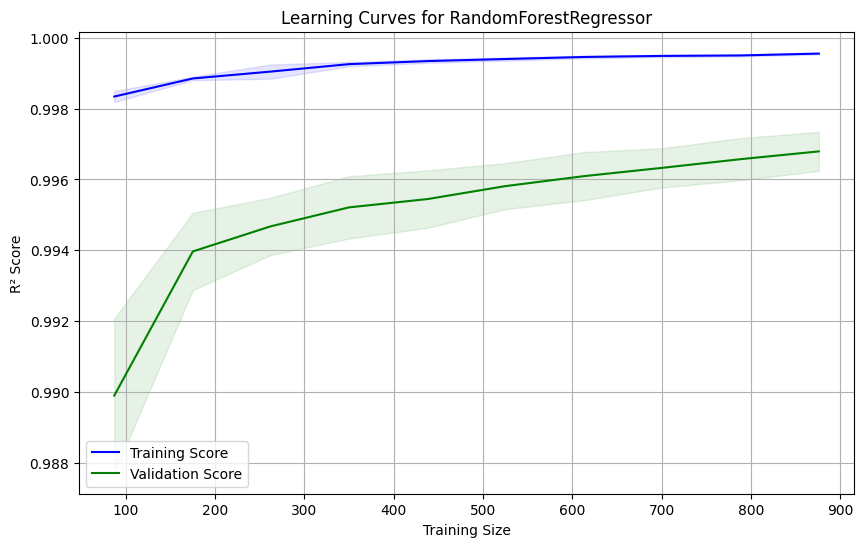

In [26]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
from sklearn.ensemble import RandomForestRegressor

# Define the model
rfr = RandomForestRegressor(random_state=42)

# Generate learning curves with aligned data
train_sizes, train_scores, val_scores = learning_curve(
    rfr, X_train_aligned, Y_train_aligned, cv=5, scoring='r2', n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 10)
)

# Calculate the mean and standard deviation for the training and validation scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
val_scores_std = np.std(val_scores, axis=1)

# Plot the learning curves
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_scores_mean, label="Training Score", color="blue")
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, color="blue", alpha=0.1)
plt.plot(train_sizes, val_scores_mean, label="Validation Score", color="green")
plt.fill_between(train_sizes, val_scores_mean - val_scores_std,
                 val_scores_mean + val_scores_std, color="green", alpha=0.1)

# Add labels and title
plt.title('Learning Curves for RandomForestRegressor')
plt.xlabel('Training Size')
plt.ylabel('R² Score')
plt.legend(loc="best")
plt.grid()
plt.show()


In [27]:
import pickle

# Save the model to a file
with open('trained_model.pkl', 'wb') as model_file:
    pickle.dump(rfr, model_file)


In [62]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Features used for prediction
features = ['maxtemp_c', 'mintemp_c', 'maxwind_kph', 'totalprecip_mm', 'avghumidity']
target = 'avgtemp_c'

# Split the data into training and testing sets
X = dfWeather[features]
y = dfWeather[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)


RandomForestRegressor(random_state=42)

In [63]:

from transformers import AutoModelForCausalLM, AutoTokenizer
import torch
import re



# Load pre-trained DialoGPT model and tokenizer
tokenizer = AutoTokenizer.from_pretrained("microsoft/DialoGPT-medium")  # You can also use 'small' or 'large'
model = AutoModelForCausalLM.from_pretrained("microsoft/DialoGPT-medium")

# Function to handle conversation using DialoGPT
def get_dialogpt_response(prompt):
    input_ids = tokenizer.encode(prompt + tokenizer.eos_token, return_tensors='pt')

    bot_output = model.generate(
        input_ids,
        max_length=150,
        pad_token_id=tokenizer.eos_token_id,
        do_sample=True,  # Enable sampling for diverse responses
        top_p=0.95,  # Use nucleus sampling
        temperature=0.7  # Adjust randomness
    )

    response = tokenizer.decode(bot_output[:, input_ids.shape[-1]:][0], skip_special_tokens=True)
    return response



In [64]:
# Function to handle single-date weather queries
def get_weather_info_single_date(city, date):
    row = dfWeather[(dfWeather['city'].str.lower() == city.lower()) & (dfWeather['date'] == date)]
    if not row.empty:
        weather = row.iloc[0]
        return (f"The weather in {city} on {date}: Max Temp: {weather['maxtemp_c']}°C, "
                f"Min Temp: {weather['mintemp_c']}°C, Humidity: {weather['avghumidity']}%, "
                f"Wind Speed: {weather['maxwind_kph']} kph, Precipitation: {weather['totalprecip_mm']} mm.")
    else:
        return f"Sorry, no weather data available for {city} on {date}."

# Function to handle range weather queries
def get_weather_info_range(city, start_date, end_date):
    rows = dfWeather[(dfWeather['city'].str.lower() == city.lower()) &
                     (dfWeather['date'] >= start_date) & (dfWeather['date'] <= end_date)]
    if not rows.empty:
        response = f"Weather data for {city} from {start_date} to {end_date}:\n"
        for index, row in rows.iterrows():
            response += (f"Date: {row['date']}, Max Temp: {row['maxtemp_c']}°C, "
                         f"Min Temp: {row['mintemp_c']}°C, Humidity: {row['avghumidity']}%, "
                         f"Wind Speed: {row['maxwind_kph']} kph, Precipitation: {row['totalprecip_mm']} mm.\n")
        return response
    else:
        return f"Sorry, no weather data available for {city} between {start_date} and {end_date}."


# Function to predict the next day's average temperature based on the last known data
def predict_next_day_weather(city, last_date):
    # Get the last row of weather data for the city
    last_row = dfWeather[(dfWeather['city'].str.lower() == city.lower()) & (dfWeather['date'] == last_date)]

    if last_row.empty:
        return "Sorry, I don't have enough data to make a prediction."

    # Prepare the input for prediction (use the relevant features)
    X_last = last_row[['maxtemp_c', 'mintemp_c', 'maxwind_kph', 'totalprecip_mm', 'avghumidity']].values

    # Convert X_last to a DataFrame with the correct feature names
    X_last_df = pd.DataFrame(X_last, columns=['maxtemp_c', 'mintemp_c', 'maxwind_kph', 'totalprecip_mm', 'avghumidity'])

    # Predict the next day's avg temperature
    predicted_avg_temp = rf_model.predict(X_last_df)[0]

    return f"Prediction for the next day: Avg Temp: {predicted_avg_temp:.2f}°C (based on historical trends)."



In [65]:
# Function to parse user input and detect weather queries
def is_weather_query(user_input):
    # Check for specific patterns like "weather", "in", "on", "from", "to", and date format YYYY-MM-DD
    date_pattern = r"\d{4}-\d{2}-\d{2}"
    if re.search(r"(weather|in|on|from|to)", user_input.lower()) and re.search(date_pattern, user_input):
        return True
    return False


In [66]:
# Main chatbot loop with refined scenarios for weather queries
while True:
    user_input = input("You: ")

    # Exit condition
    if user_input.lower() in ["exit", "quit", "bye"]:
        print("Bot: Goodbye! Have a nice day!")
        break

    # Check if the query is weather-related
    if is_weather_query(user_input):
        # Extract city and date(s) from input
        city_match = re.search(r"in (\w+)", user_input.lower())
        city = city_match.group(1) if city_match else None

        # Extract date or date range
        dates = re.findall(r"\d{4}-\d{2}-\d{2}", user_input)

        # Handle Scenario 1: Single-date query
        if city and len(dates) == 1:
            weather_response = get_weather_info_single_date(city, dates[0])
            print(f"Bot: {weather_response}")

        # Handle Scenario 2: Date range query (without prediction)
        elif city and len(dates) == 2 and "predict" not in user_input.lower():
            weather_response = get_weather_info_range(city, dates[0], dates[1])
            print(f"Bot: {weather_response}")

        # Handle Scenario 3: Date range query with prediction
        elif city and len(dates) == 2 and "predict" in user_input.lower():
            # Provide weather info for the range
            weather_response = get_weather_info_range(city, dates[0], dates[1])
            print(f"Bot: {weather_response}")

            # Predict the next day's weather based on the last date in the range
            prediction_response = predict_next_day_weather(city, dates[1])
            print(f"Bot: {prediction_response}")

        else:
            print("Bot: Sorry, I couldn't understand the city or date range. Please try again.")

    else:
        # Handle normal conversation using DialoGPT
        response = get_dialogpt_response(user_input)
        print(f"Bot: {response}")


You: Show me the weather in Islamabad from 2023-09-28 to 2023-10-02 and predict
Bot: Weather data for islamabad from 2023-09-28 to 2023-10-02:
Date: 2023-09-28, Max Temp: 33.7°C, Min Temp: 21.2°C, Humidity: 31%, Wind Speed: 14.4 kph, Precipitation: 0.26 mm.
Date: 2023-09-29, Max Temp: 33.2°C, Min Temp: 20.2°C, Humidity: 35%, Wind Speed: 10.8 kph, Precipitation: 0.5 mm.
Date: 2023-09-30, Max Temp: 33.4°C, Min Temp: 20.2°C, Humidity: 34%, Wind Speed: 18.4 kph, Precipitation: 0.0 mm.
Date: 2023-10-01, Max Temp: 33.4°C, Min Temp: 20.2°C, Humidity: 30%, Wind Speed: 14.8 kph, Precipitation: 0.0 mm.
Date: 2023-10-02, Max Temp: 32.9°C, Min Temp: 20.2°C, Humidity: 30%, Wind Speed: 13.7 kph, Precipitation: 0.0 mm.

Bot: Prediction for the next day: Avg Temp: 26.03°C (based on historical trends).
You: how are you?
Bot: doing great, just going to sleep now.
You: Show me the weather in Islamabad from 2023-09-28 to 2023-10-02
Bot: Weather data for islamabad from 2023-09-28 to 2023-10-02:
Date: 2023-